# Question 1

## (a)

*Hint: use `seaborn.snsplot` to visualize data. use `np.corrcoef` to calculate the correlation matrix and use `seaborn.heatmap` to visualize the correlation matrix.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [2]:
# Load data
df = pd.read_csv("compounds.csv")
# Display the first row of df
df.head()

,A,B,C,D,type,Start assignment
0,6.4,2.9,4.3,1.3,amide,1
1,5.7,4.4,1.5,0.4,phenol,2
2,6.7,3.0,5.2,2.3,ether,0
3,5.8,2.8,5.1,2.4,ether,1
4,6.4,3.2,5.3,2.3,ether,0


In [3]:
X_features = df.iloc[:,:-2]
y=df['type']

# Preprocessed the data: Rescale the features to a value between 0 and 1
X_featuresA = df['A']/max(df['A'])
X_featuresB = df['B']/max(df['B'])
X_featuresC = df['C']/max(df['C'])
X_featuresD = df['D']/max(df['D'])

# Rejoint the features
X_features_preprocessed = pd.concat([X_featuresA,X_featuresB, X_featuresC, X_featuresD], axis=1)
print(X_features_preprocessed)
X_features_preprocessed.info()
y.info()

            A         B         C     D
0    0.810127  0.659091  0.623188  0.52
1    0.721519  1.000000  0.217391  0.16
2    0.848101  0.681818  0.753623  0.92
3    0.734177  0.636364  0.739130  0.96
4    0.810127  0.727273  0.768116  0.92
..        ...       ...       ...   ...
145  0.683544  0.886364  0.188406  0.16
146  0.797468  0.568182  0.724638  0.76
147  0.759494  0.772727  0.652174  0.64
148  0.784810  0.659091  0.623188  0.52
149  0.708861  0.681818  0.594203  0.52

[150 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       150 non-null    float64
 1   B       150 non-null    float64
 2   C       150 non-null    float64
 3   D       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: type
Non-Null Count  Dtype 
--------------  ---

features shape: (150, 4)


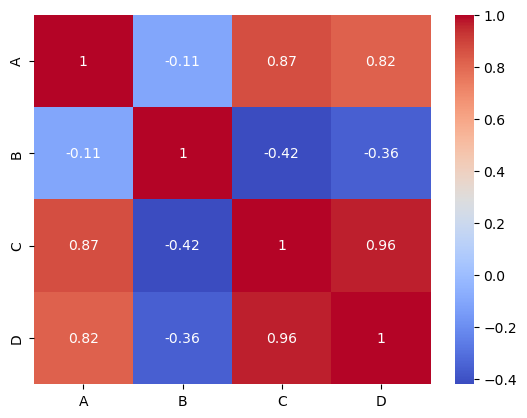

In [4]:
# Calculate the correlation matrix
features = X_features_preprocessed.values
corrmat = np.corrcoef(features.T)
# seaborn vis
sns.heatmap(corrmat,cmap='coolwarm', xticklabels=X_features_preprocessed.columns, yticklabels=X_features_preprocessed.columns, annot=True)
print("features shape:", features.shape)

**Answer:** 
+ The result of testing reagent C and D are most correlated (positive).
+ The result of testing reagent A, C, D are highly correlated (positive).
+ The result of testing reagent B is negative correlated to others.

## (b)

### \[IMPORTANT\] Fill in and use the KMeans code below. DO NOT USE  `sklearn.cluster.KMeans`.

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters. Refer to Tutorial 5.*

In [5]:
import warnings
from scipy.spatial.distance import cdist


class KMeans():
    def __init__(self, n_clusters, max_iter=100):
        self.k = n_clusters
        self.max_iter = max_iter
    
    def cluster(self, X, restart=True):
        """
        Do K-Means clustering
        
        Parameters
        ----------
        X: np.ndarray
            Normalized input features, shape (n_samples, n_features)
        """
        centroids = np.random.random((self.k, X.shape[1]))
        assignments = np.zeros(X.shape[0])
        new_assignments = self.create_new_assignments(centroids, X)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        if restart==True and len(np.unique(new_assignments)) < self.k:
            return self.cluster(X)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.max_iter:
            # compute centroids
            centroids = np.array([np.mean(X[new_assignments==i],axis=0) for i in range(self.k)])
            assignments = new_assignments
            # call the self.create_new_assignments
            new_assignments = self.create_new_assignments(centroids, X)
            if len(np.unique(new_assignments)) < self.k:
                warnings.warn('Warning: At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.max_iter:
                 warnings.warn("Warning: Maximum number of iterations reached!")
        return new_assignments
            
        
    def create_new_assignments(self, centroids, X):
        """
        Assign each datapoint to its nearest centroid.
        
        Parameters
        ----------
        centroids: np.ndarray
            Centroid of each cluster, shape (n_clusters, n_features)
        X: np.ndarray
            Input features, shape (n_samples, n_features)
        
        Returns
        ------
        new_assignments: np.ndarray
            Index of cluster which each data point belongs to, shape (n_samples,)
        """
        # Compute the distances that stores the Eucledian distances between each datapoints and the centroid
        # shape (n_samples, n_clusters)
        # Hint: you can use cdist in scipy.spatial.distance. 
        # cdist doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
        distances = cdist(X,centroids,'euclidean')
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments

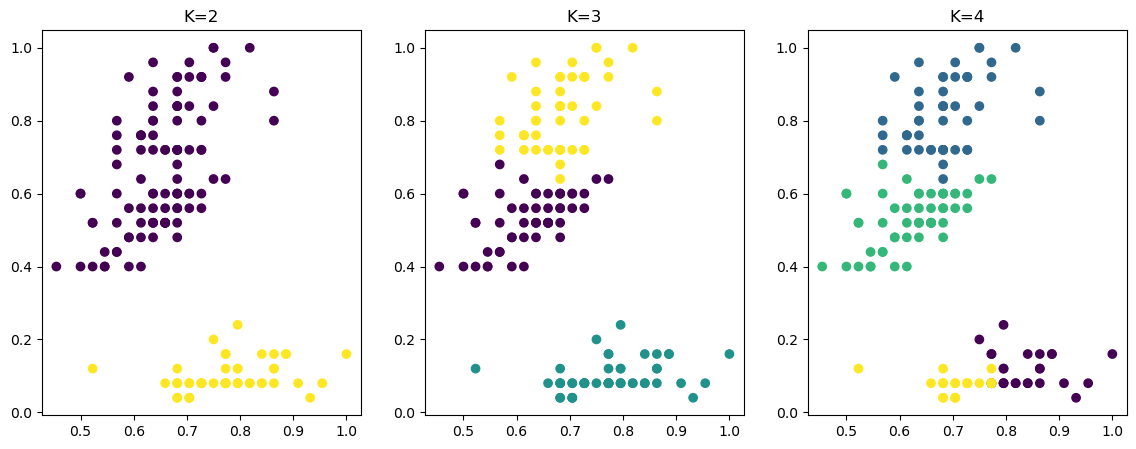

In [6]:
# Create scatter plots for feature B and feature D in different K-value
fig, ax = plt.subplots(1,3, figsize=(14,5))

# KMeans, K=2
KM2 = KMeans(n_clusters=2)
assignments_KM2 = KM2.cluster(X=features)
ax[0].scatter(features[:,1],features[:,3], c=assignments_KM2)
ax[0].set_title('K=2')

# KMeans, K=3
KM3 = KMeans(n_clusters=3)
assignments_KM3 = KM3.cluster(X=features)
ax[1].scatter(features[:,1],features[:,3], c=assignments_KM3)
ax[1].set_title('K=3')

# KMeans, K=4
KM4 = KMeans(n_clusters=4)
assignments_KM4 = KM4.cluster(X=features)
ax[2].scatter(features[:,1],features[:,3], c=assignments_KM4)
ax[2].set_title('K=4')

plt.show()

## (c)

### [IMPORTANT] Use the following function to validate your result. See the example in the docstring for usage.

*For debuuging: you will get output like (not the same as) this*:

```
Class 0 - amide: 48 out of 50 are classified correctly
Class 1 - ether: 46 out of 50 are classified correctly
Class 2 - phenol: 50 out of 50 are classified correctly
```

In [7]:
def validate(y_pred, y_true):
    """
    Validate the results of clustering
    
    Parameters
    ---------
    y_pred: np.ndarray
        Predicted clusters
    y_true: list or np.ndarray
        Ground truth clusters
    
    Example
    ------
    >>> validate(model.cluster(features), df['type'].values)
    """
    # correct classification
    compounds = np.unique(y_true) # should be ['amide','phenol','ether'] for compounds dataset
    clusters = [np.where(y_true == c)[0] for c in compounds]
    pred_class = np.unique(y_pred)
    
    #remove -1 for noise point in DBSCAN
    pred_class = np.delete(pred_class, np.where(pred_class == -1))
    assert len(pred_class) == len(compounds), \
        f'Predicted clusters has less or more than {len(compounds)} classes: {pred_class}'
    for i in range(3):
        #loop over solutions
        counts = []
        scores = []
        for j in range(3):
            # loop over clusters of true assignments
            sol_i = np.where(y_pred == pred_class[i])[0]
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1] / len(clusters[j]))
        idx = np.argmax(scores)
        print(
            f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out of {len(clusters[j])}'
            ' are classified correctly'
        ) 

In [8]:
# Change y into ndarray
y_labels = y.values

# Validate the result
validate(assignments_KM3, y_labels)

Class 0 - amide: 48 out of 50 are classified correctly
Class 1 - phenol: 50 out of 50 are classified correctly
Class 2 - ether: 46 out of 50 are classified correctly


**Answer:** 
+ Testing reagent "ether" got 0.92 accuracy.
+ Testing reagent "phenol" got 1.0 accuracy.
+ Testing reagent "amide" got 0.96 accuracy.
  
The performance of KMeans when K=3 is good since the accuracy of each cluster is over 0.90. However, this might be a sign of overfitting, because it is uncommon to get 100% accuracy.

## (d)

In [9]:
ntrials = 200
count = 0
for i in range(ntrials):
    kmeans = KMeans(n_clusters=4) 
    results = kmeans.cluster(features,restart=True)
    if len(np.unique(results)) == 4:
        count += 1
print(f'Out of {ntrials} number of KMeans trials, only {count} gives 4 clusters')

Out of 200 number of KMeans trials, only 199 gives 4 clusters


C:\Users\ian32\AppData\Local\Temp\ipykernel_11324\385271299.py:36: UserWarning: Warning: At least one centroid vanishes
  warnings.warn('Warning: At least one centroid vanishes')
C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\ian32\AppData\Local\Temp\ipykernel_11324\385271299.py:39: UserWarning: Warning: Maximum number of iterations reached!
  warnings.warn("Warning: Maximum number of iterations reached!")


In [10]:
ntrials = 200
count = 0
for i in range(ntrials):
    kmeans = KMeans(n_clusters=4) 
    results = kmeans.cluster(features,restart=False) # Comment out the re-init code in KMeans
    if len(np.unique(results)) == 4:
        count += 1
print(f'Out of {ntrials} number of KMeans trials, only {count} gives 4 clusters')

C:\Users\ian32\AppData\Local\Temp\ipykernel_11324\385271299.py:36: UserWarning: Warning: At least one centroid vanishes
  warnings.warn('Warning: At least one centroid vanishes')
C:\Users\ian32\AppData\Local\Temp\ipykernel_11324\385271299.py:39: UserWarning: Warning: Maximum number of iterations reached!
  warnings.warn("Warning: Maximum number of iterations reached!")


Out of 200 number of KMeans trials, only 39 gives 4 clusters


**Answer:** Bad initialization (get an awful initial centorid set) usually ends up with the worng number of cluster. After comment out he part of my code that reinitialize the centroid, all of the bad initialization will be kept. Therefore, the proportion of correct result (got the right number of clusters) is much lower than the KMeans model with the setting of re-initialization (almost one sixth).

# Question 2

## (a)

*Hint*:
+ Use `sklearn.cluster.DBSCAN` and adjust `eps`(Rcut) and `min_samples`(MinPts) parameters.**
+ Core points are stored in `core_sample_indices_` attribute.
+ Cluster results are stored in `labels_` attribute and noise points are labeled as -1.


In [11]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

#Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_features)

# avg. and std. of scaled data
print("After scaling:")
print("Avg:", np.mean(X_norm, axis=0))
print("Std:", np.std(X_norm, axis=0))

After scaling:
Avg: [-4.14483263e-16 -6.08402217e-16  2.96059473e-16 -1.42108547e-16]
Std: [1. 1. 1. 1.]


In [12]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps= 0.2, min_samples=10)
db.fit(X_norm)
db.core_sample_indices_
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [13]:
# Find the proper parameter
for eps in np.arange(0.1, 2.0, 0.1):
    for min_samples in range(2, 20):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_norm)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters==3:
            print(f"EPS: {eps}, Min Samples: {min_samples}, Clusters: {n_clusters}") 


EPS: 0.2, Min Samples: 4, Clusters: 3
EPS: 0.30000000000000004, Min Samples: 5, Clusters: 3
EPS: 0.4, Min Samples: 7, Clusters: 3
EPS: 0.5, Min Samples: 8, Clusters: 3
EPS: 0.5, Min Samples: 10, Clusters: 3
EPS: 0.6, Min Samples: 4, Clusters: 3
EPS: 0.6, Min Samples: 11, Clusters: 3
EPS: 0.6, Min Samples: 13, Clusters: 3
EPS: 0.7000000000000001, Min Samples: 2, Clusters: 3
EPS: 0.7000000000000001, Min Samples: 17, Clusters: 3
EPS: 0.7000000000000001, Min Samples: 18, Clusters: 3
EPS: 0.8, Min Samples: 2, Clusters: 3
EPS: 0.9, Min Samples: 2, Clusters: 3


In [14]:
db = DBSCAN(eps= 0.5, min_samples=8)
db.fit(X_norm)
db.core_sample_indices_
db.labels_

array([ 0, -1,  2, -1,  2,  1, -1,  2,  0,  2,  0, -1, -1,  2,  1,  1,  2,
        2,  0,  1,  1, -1, -1, -1,  1,  2,  1,  1,  1,  2, -1,  1, -1,  1,
       -1, -1,  1, -1,  0,  1,  0,  0, -1,  0,  1,  0,  2, -1,  2, -1, -1,
        0, -1, -1,  2,  0, -1, -1,  2,  1,  1,  0,  1,  0, -1,  1, -1,  1,
       -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1,  1,  1, -1, -1,
       -1, -1,  0, -1, -1,  0, -1,  1,  1, -1,  1,  2, -1, -1, -1, -1, -1,
        0, -1,  0,  1,  1,  1,  1,  0, -1,  1,  1, -1,  0, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1,  2, -1,  2,  0, -1,  0, -1, -1,
        1,  0,  1,  0,  2,  1,  0,  1,  0,  1, -1, -1,  0,  0],
      dtype=int64)

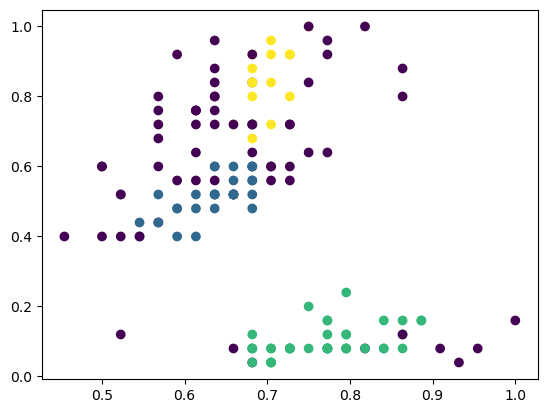

In [15]:
# Scatter plot for feature B and feature D
fig, ax_dbscan = plt.subplots()
ax_dbscan.scatter(features[:,1],features[:,3], c=db.labels_)
plt.show()

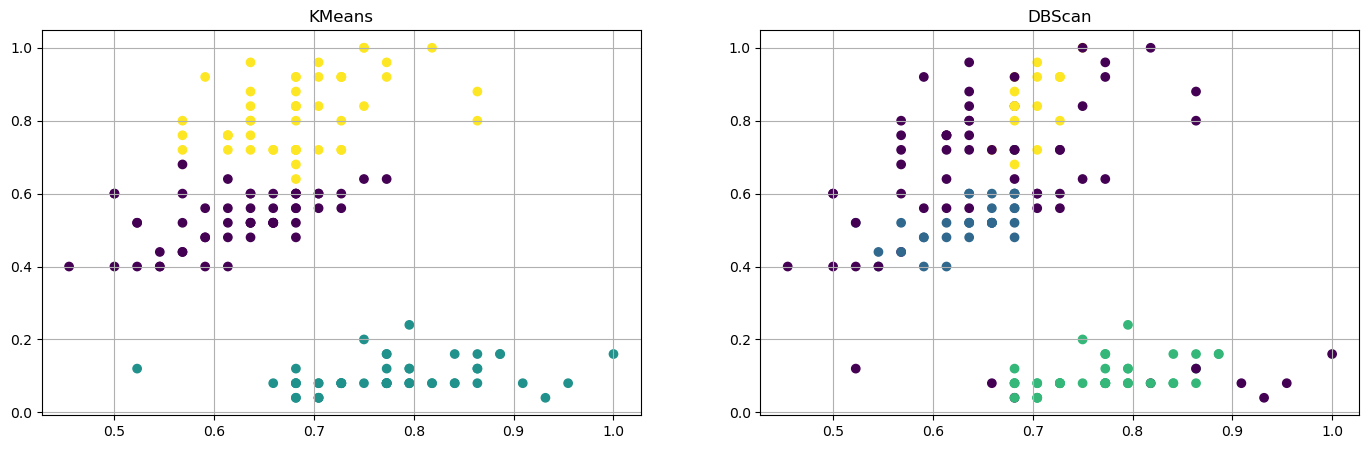

In [16]:
# Make the comparsion
fig, (ax_kmeans,ax_dbscan) = plt.subplots(1,2, figsize=(17,5))

ax_kmeans.scatter(features[:,1],features[:,3], c=assignments_KM3)
ax_kmeans.set_title('KMeans')
ax_kmeans.grid(True)

ax_dbscan.scatter(features[:,1],features[:,3], c=db.labels_)
ax_dbscan.set_title('DBScan')
ax_dbscan.grid(True)

plt.show()

amide
ether
phenol


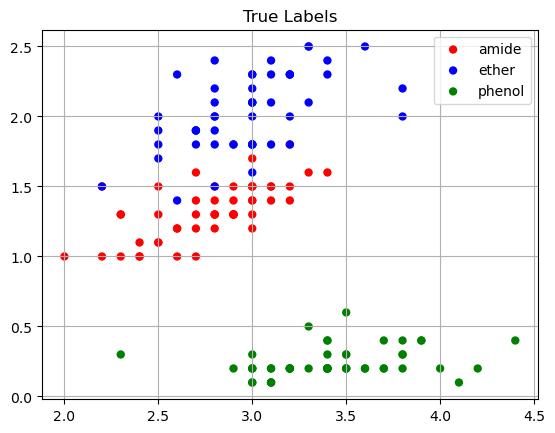

In [17]:
# Scatter plot for feature B and feature D
colors = ['red', 'blue', 'green',]  #  colors 
i=0

fig, ax_true = plt.subplots()
for i, type in enumerate(np.unique(df['type'].values)):
    samples= df[df['type']==type].values
    x, y = samples[:,1], samples[:,3]
    ax_true.scatter(x, y, c=colors[i%len(colors)], label=type, edgecolors='none')
    print(type)

ax_true.legend()
ax_true.grid(True)
ax_true.set_title('True Labels')

plt.show()

In [18]:
# Calculate the amount of core, border, and noise
clusters_QA, counts_QA = np.unique(db.labels_, return_counts=True)
border = np.sum([counts_QA[i] for i in range(1,4)]) - len(db.core_sample_indices_)
print(f" The amount of cores is {len(db.core_sample_indices_)}\n The amount of borders is {border}\n The amount of noise is {counts_QA[0]}\n")

# Validate the result
validate(db.labels_, y_labels)

 The amount of cores is 46
 The amount of borders is 44
 The amount of noise is 60

Class 0 - amide: 30 out of 50 are classified correctly
Class 1 - phenol: 41 out of 50 are classified correctly
Class 2 - ether: 16 out of 50 are classified correctly


## (b)

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters. Refer to Tutorial 5.*

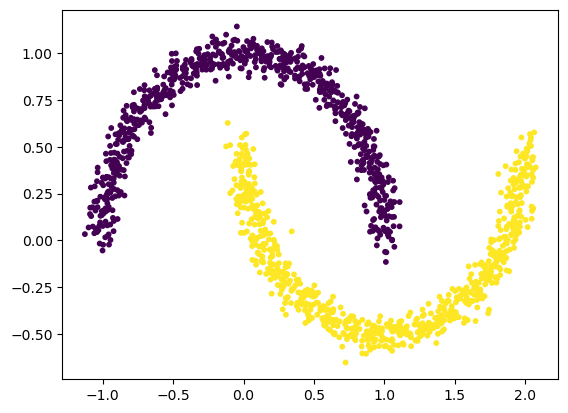

In [19]:
from sklearn import datasets

def moon_dataset(n_samples=1500):
    """
    Generate datasets. We choose the size big enough to see the scalability
    of the algorithms, but not too big to avoid too long running times
    
    Parameters
    ---------
    n_samples: int
        Number of data points
    
    Returns
    ------
    X: np.ndarray
        Data points, shape (n_samples, 2)
    y: np.ndarray
        Clusters that each point belongs to, shape (n_samples)
    """
    np.random.seed(0)
    n_samples = 1500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
    X, y = noisy_moons
    return X, y

X, y = moon_dataset()
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

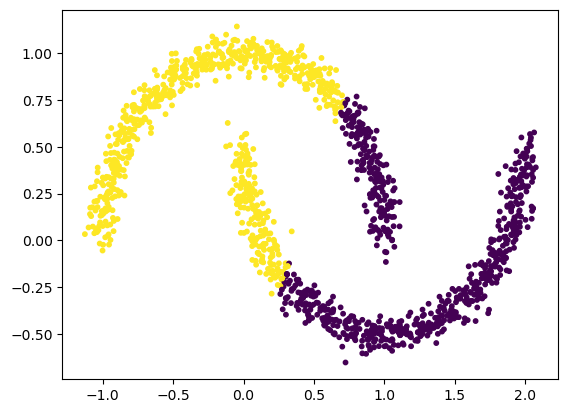

In [20]:
# KMeans, K=2
moondata_KM2 = KM2.cluster(X=X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=moondata_KM2)

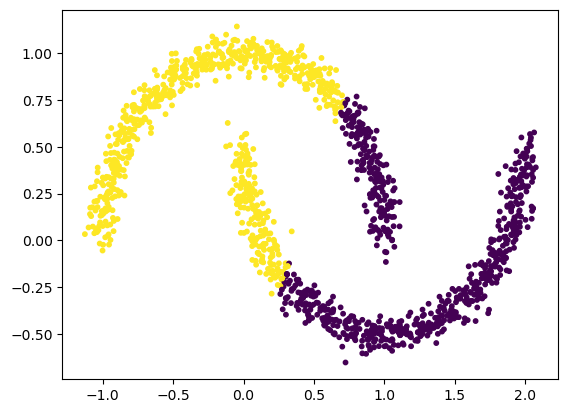

In [21]:
# KMeans, K=2
moondata_KM2 = KM2.cluster(X=X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=moondata_KM2)

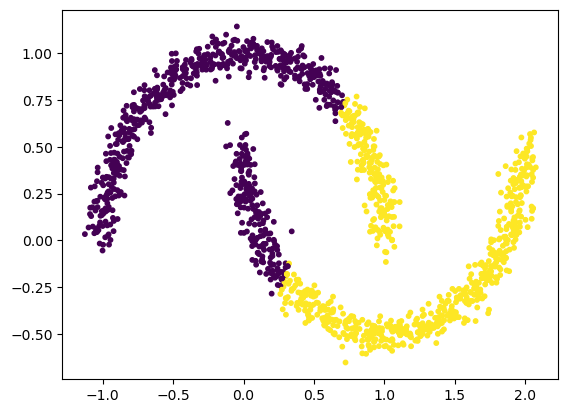

In [22]:
# KMeans, K=2
moondata_KM2 = KM2.cluster(X=X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=moondata_KM2)

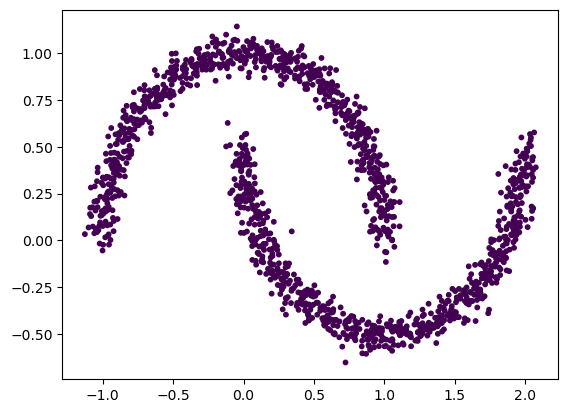

In [23]:
# DBSCAN
db2 = DBSCAN(eps= 0.1, min_samples=100)
db2.fit(X)
db2.core_sample_indices_
db2.labels_

plt.scatter(X[:, 0], X[:, 1], s=10, c=db2.labels_)

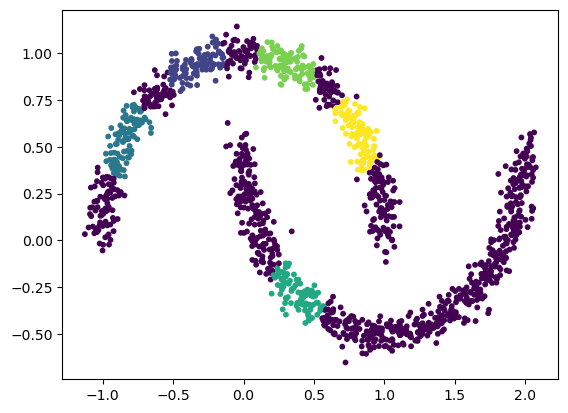

In [24]:
# DBSCAN
db2 = DBSCAN(eps= 0.2, min_samples=100)
db2.fit(X)
db2.core_sample_indices_
db2.labels_

plt.scatter(X[:, 0], X[:, 1], s=10, c=db2.labels_)

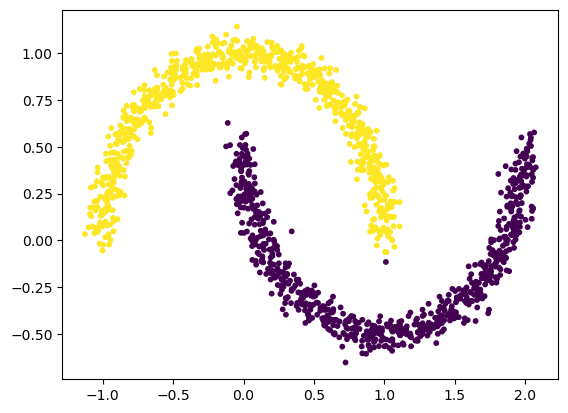

In [25]:
# DBSCAN
db2 = DBSCAN(eps= 0.3, min_samples=100)
db2.fit(X)
db2.core_sample_indices_
db2.labels_

plt.scatter(X[:, 0], X[:, 1], s=10, c=db2.labels_)

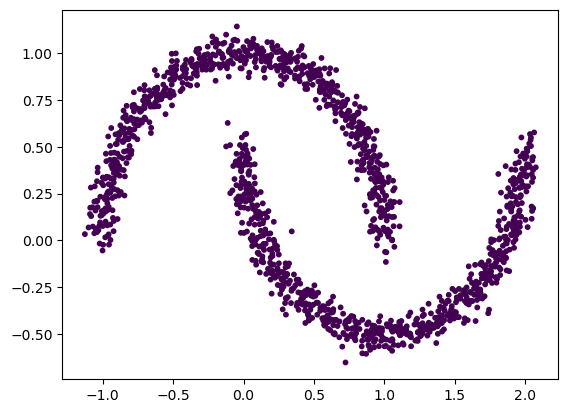

In [26]:
# DBSCAN
db2 = DBSCAN(eps= 0.2, min_samples=250)
db2.fit(X)
db2.core_sample_indices_
db2.labels_

plt.scatter(X[:, 0], X[:, 1], s=10, c=db2.labels_)

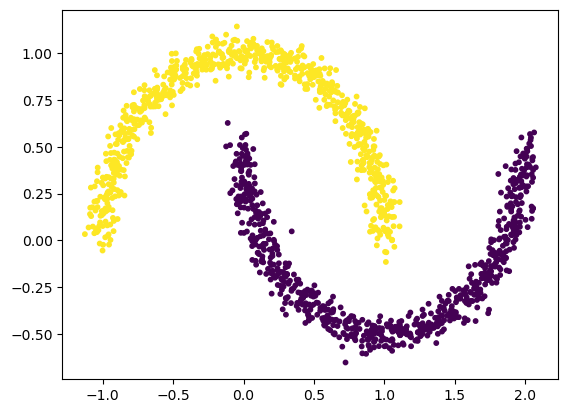

In [27]:
# DBSCAN
db2 = DBSCAN(eps= 0.2, min_samples=50)
db2.fit(X)
db2.core_sample_indices_
db2.labels_

plt.scatter(X[:, 0], X[:, 1], s=10, c=db2.labels_)

**Answer:** DBScan works better on meen dataset. The reason of inferior performance of KMeans is that the moon dataset is not linear separable.

Linear separable

# Question 3

## (a)

In [28]:
from sklearn.preprocessing import StandardScaler

#Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(df.iloc[:,:-2])

#print(X_norm)
df_norm = df.copy()
df_norm.iloc[:,:4]=X_norm

df_norm

,A,B,C,D,type,Start assignment
0,0.674501,-0.356361,0.307833,0.133226,amide,1
1,-0.173674,3.114684,-1.284407,-1.050031,phenol,2
2,1.038005,-0.124958,0.819624,1.447956,ether,0
3,-0.052506,-0.587764,0.762759,1.579429,ether,1
4,0.674501,0.337848,0.876490,1.447956,ether,0
...,...,...,...,...,...,...
145,-0.537178,1.957669,-1.398138,-1.050031,phenol,1
146,0.553333,-1.281972,0.705893,0.922064,ether,0
147,0.189830,0.800654,0.421564,0.527645,amide,0
148,0.432165,-0.356361,0.307833,0.133226,amide,0


## (b)

In [29]:
# Place the initial centroid based on the start assignment
y_start_assignment = df['Start assignment'].values

Centroids=[]

for class_number in np.unique(df['Start assignment'].values):
    sample_index = np.where(y_start_assignment == class_number)[0]
    samples= X_norm[sample_index]
    centroid = np.mean(samples, axis=0)
    print("The centroid of class_", class_number, "is", centroid)
    Centroids.append(centroid)


The centroid of class_ 0 is [-0.03311922 -0.05553671 -0.0083403   0.0385654 ]
The centroid of class_ 1 is [0.10985887 0.04165253 0.10425379 0.09115459]
The centroid of class_ 2 is [-0.07673965  0.01388418 -0.09591349 -0.12972   ]


## (c)

*For debugging: should be 596.4585801741025*

In [30]:
# If you feel the code is slow in Q3(d), use numba to accelerate it
import numba

@numba.njit()
def cost_func(features, centroids, clusters):
    """
    Parameters
    ----------
    features: np.ndarray
        Feature matrix, shape (n_samples, n_features). In the compound dataset, n_features = 4.
    centroids: np.ndarray
        Centroids of each cluster, shape (n_cluster, n_features). In this question, n_cluster = 3.
    clusters: np.ndarray
        Cluster which each datapoint belongs to. shape (n_samples,)
    """
    loss = 0
    for class_number, class_type in enumerate(np.unique(clusters)):
        sample_index = np.where(clusters == class_type)[0]
        samples = features[sample_index]
        for sample in samples:
            loss += np.linalg.norm(centroids[class_number] - sample)**2
    return loss

In [31]:
loss = cost_func(X_norm,Centroids,y_start_assignment)
print(loss)

C:\Users\ian32\anaconda3\envs\C242\lib\site-packages\numba\core\ir_utils.py:2172: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'centroids' of function 'cost_func'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\..\..\AppData\Local\Temp\ipykernel_11324\3264495478.py", line 4:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


596.4585801741022


## (d)

*For debugging*: 
+ Cooling schedule should be like: `array([500. , 499.5, 499.0005, ..., 3.37065784, 3.36728719, 3.3639199])`
+ Cost function can drop to around 540 (or even smaller).

In [32]:
def cal_centroids(features, clusters):
    centroids = []
    for class_number in np.unique(clusters):
        sample_index = np.where(clusters == class_number)[0]  # Use clusters instead of features
        samples = features[sample_index]
        centroid = np.mean(samples, axis=0)
        centroids.append(centroid)
    return centroids

In [33]:
import random

def SA(features, cluster, schedule, report_interval=100):
    """
    Simulated Annealing for clustering
    
    Parameters
    ----------
    features: numpy.ndarray
        Feature matrix. shape (n_samples, n_features)
    cluster: numpy.ndarray
        Initial guess of clusters. shape (n_samples,)
    schedule: numpy.ndarray
        Cooling schedule.
    report_interval: int
        Interval of steps to report result
    
    Returns
    ------
    res: dict
        Result containing the best clustering with the cost function value
    """
    # calculate the centroids
    centroids = cal_centroids(features,cluster)
    # calulate the cost fucntion
    cluster_eval = cost_func(features, centroids, cluster)
    
    best_cluster = cluster.copy()
    lowest_eval = cluster_eval

    for step, temp in enumerate(schedule):
        if step % report_interval == 0:
            print(step, temp, lowest_eval)
        for n in range(features.shape[0]):
            trial = cluster.copy()
            # Do a Metroplis step by swtiching a sample to differenct cluster
            choices = [0, 1, 2]
            choices.remove(cluster[n]) # remove the current cluster
            rand_choice = random.choice(choices) # choose a different cluster
            trial[n] = rand_choice # switch the cluster
            
            # calculate the centroids & cost function
            trial_centroids = cal_centroids(features, trial)
            trial_eval = cost_func(features, trial_centroids, trial)
            # Metroplis rule
            if trial_eval < cluster_eval or np.random.rand() < np.exp((cluster_eval - trial_eval) / temp):
                cluster = trial
                cluster_eval = trial_eval
                if trial_eval < lowest_eval:
                    best_cluster = cluster.copy()
                    lowest_eval = cluster_eval
                    
    return {"solution": best_cluster, "evaluation": lowest_eval}

In [34]:
def geometric_cooling(init_temp, num_steps, alpha):
    temp = [init_temp*(alpha**i) for i in range(num_steps)]
    return temp

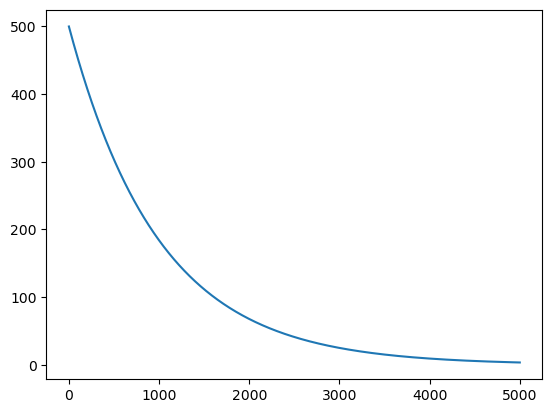

In [35]:
cooling_schedule = geometric_cooling(500, 5000, 0.999)
plt.plot(cooling_schedule)

In [36]:
# Translate the types of classes into the number of classses
y_labels_num = []
for index, sample in enumerate(y_labels):
    if y_labels[index]=='phenol':
        y_labels_num.append(0)
    elif y_labels[index]=='ether':
        y_labels_num.append(1)
    else:
        y_labels_num.append(2)
#y_labels_num = np.array(y_labels_num)
print(y_labels_num)

[2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2]


In [37]:
# Apply SA to the dataset
solutions=[]

for i in range(3):
    print(f"## Trial {i} ##")
    res = SA(X_norm, y_start_assignment, cooling_schedule)
    print(res)
    solutions.append(res)

    # calculate the amount for each cluster
    count_phenol = np.sum(res['solution']==0)
    count_ether = np.sum(res['solution']==1)
    count_amide = np.sum(res['solution']==2)
    print("The amount of phenol is ", count_phenol)
    print("The amount of ether is ", count_ether)
    print("The amount of amide is ", count_amide)
    
    validate(res['solution'],y_labels_num)

## Trial 0 ##
0 500.0 596.4585801741022
100 452.39607355685445 552.6139644115751
200 409.3244147393178 543.3018067919173
300 370.3535160780496 543.3018067919173
400 335.09295300337004 543.3018067919173
500 303.18947243059233 543.3018067919173
600 274.32345374274837 527.4924186482366
700 248.20570671554947 527.4924186482366
800 224.57457430503754 527.4924186482366
900 203.1933112726021 527.4924186482366
1000 183.84771238548186 527.4924186482366
1100 166.34396643120374 527.4924186482366
1200 150.50671454669956 527.4924186482366
1300 136.17729340973838 527.4924186482366
1400 123.21214569233075 527.4924186482366
1500 111.48138185145105 527.4924186482366
1600 100.86747884857766 527.4924186482366
1700 91.26410276135121 526.1862070976234
1800 82.57504349184913 526.1862070976234
1900 74.71325089899808 526.1862070976234
2000 67.59996269874972 526.1862070976234
2100 61.163915395008395 526.1862070976234
2200 55.34063033613088 526.1862070976234
2300 50.071767744453915 526.1862070976234
2400 45.304

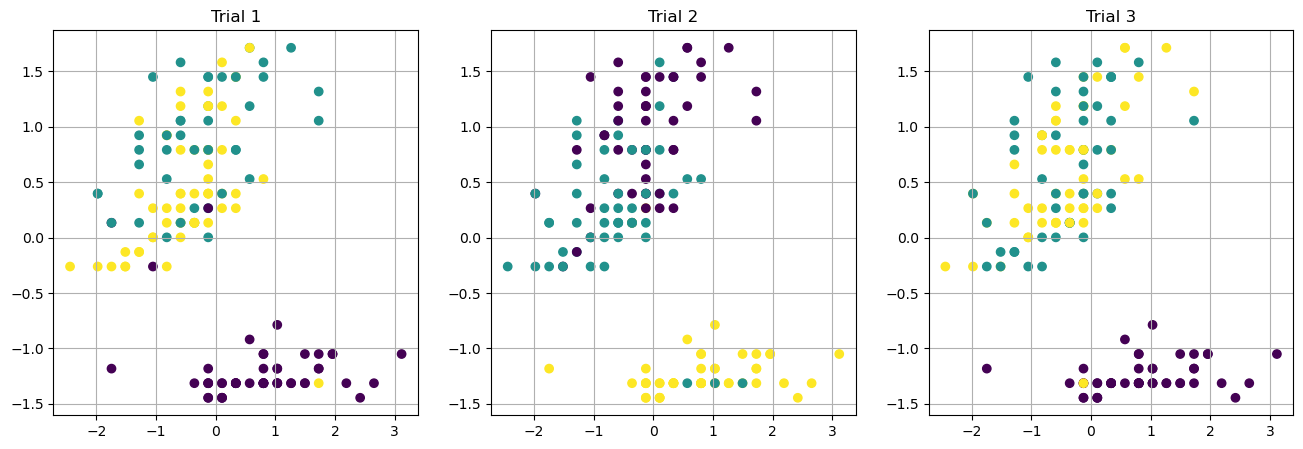

In [38]:
# Visualize the prediction

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))

ax1.scatter(X_norm[:,1],X_norm[:,3], c=solutions[0]['solution'])
ax1.set_title('Trial 1')
ax1.grid(True)

ax2.scatter(X_norm[:,1],X_norm[:,3], c=solutions[1]['solution'])
ax2.set_title('Trial 2')
ax2.grid(True)

ax3.scatter(X_norm[:,1],X_norm[:,3], c=solutions[2]['solution'])
ax3.set_title('Trial 3')
ax3.grid(True)

plt.show()

**Answer:** Given the scatter plots, SA algorithm has diffculties in classifing ether and amide. The performance of SA algorithm is worse than KMeans.